<a href="https://colab.research.google.com/github/ravenclown/ML-Practices/blob/main/Keras_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U pip keras tensorflow

In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 47000
maxlen = 200

data_train = pd.read_csv("train.csv", encoding ='iso-8859-1',sep=",",
                         header=0,names=['Text','Sentiment'])
data_test = pd.read_csv("test.csv", encoding ='iso-8859-1',sep=",",
                        header=0,names=['Text','Sentiment'])
dataset=pd.concat([data_train,data_test],ignore_index=True)

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<UNK>")
tokenizer.fit_on_texts(dataset.Text)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(dataset.Text)
X = pad_sequences(sequences, maxlen=maxlen)
y = np.array(dataset.Sentiment)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (8529, 200) (8529,)
Test data shape: (2133, 200) (2133,)


In [38]:
#LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Model parameters
embedding_dim = 50

# Build the model
model_LSTM = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    LSTM(units=32, return_sequences=False),
    Dense(units=1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model_LSTM.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_LSTM.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
#GRU Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

# Model parameters
embedding_dim = 50


# Build the model
model_GRU = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    GRU(units=32),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model_GRU.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_GRU.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_11 (GRU)                         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
#Bi-directional Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Bidirectional

# Model parameters
embedding_dim = 50

# Build the Bi-directional GRU model
model_BD = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    Bidirectional(GRU(units=32)),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model_BD.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_BD.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
#Drop-out Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Bidirectional, Dropout

# Model parameters
embedding_dim = 50

# Build the Bi-directional GRU model with Dropout
model_DO = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    Dropout(0.5),  # Dropout layer after embedding layer
    Bidirectional(GRU(units=32)),
    Dropout(0.5),  # Dropout layer after GRU layer
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model_DO.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_DO.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Train the model
batch_size = 128
epochs = 10

history_LSTM = model_LSTM.fit(X_train, y_train,
                    validation_split=0.2,
                    batch_size=batch_size,
                    epochs=epochs)

history_GRU = model_GRU.fit(X_train, y_train,
                    validation_split=0.2,
                    batch_size=batch_size,
                    epochs=epochs)

history_BD = model_BD.fit(X_train, y_train,
                    validation_split=0.2,
                    batch_size=batch_size,
                    epochs=epochs)

history_DO = model_DO.fit(X_train, y_train,
                    validation_split=0.2,
                    batch_size=batch_size,
                    epochs=epochs)



Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 175ms/step - accuracy: 0.6402 - loss: 0.6701 - val_accuracy: 0.8593 - val_loss: 0.4043
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 197ms/step - accuracy: 0.8681 - loss: 0.3776 - val_accuracy: 0.8816 - val_loss: 0.2965
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 157ms/step - accuracy: 0.9534 - loss: 0.1648 - val_accuracy: 0.8857 - val_loss: 0.2780
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.9818 - loss: 0.0866 - val_accuracy: 0.8828 - val_loss: 0.2972
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - accuracy: 0.9855 - loss: 0.0621 - val_accuracy: 0.8740 - val_loss: 0.3318
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.9930 - loss: 0.0360 - val_accuracy: 0.8769 - val_loss: 0.3305
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - accuracy: 0.9944 - loss: 0.0276 - val_accuracy: 0.8740 - val_loss: 0.3673
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 190ms/step - accuracy: 0.9973 - loss: 0.0167 - val_accu

In [40]:
# Evaluate on test data
test_loss, test_accuracy = model_LSTM.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss of LSTM: {test_loss:.4f}")
print(f"Test Accuracy of LSTM: {test_accuracy:.4f}")

test_loss, test_accuracy = model_GRU.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss of GRU: {test_loss:.4f}")
print(f"Test Accuracy of GRU: {test_accuracy:.4f}")

test_loss, test_accuracy = model_BD.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss of Bi-directional: {test_loss:.4f}")
print(f"Test Accuracy of Bi-directional: {test_accuracy:.4f}")

test_loss, test_accuracy = model_DO.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss of Drop-out: {test_loss:.4f}")
print(f"Test Accuracy of Drop-out: {test_accuracy:.4f}")

Test Loss of LSTM: 0.5206
Test Accuracy of LSTM: 0.8598
Test Loss of GRU: 0.6208
Test Accuracy of GRU: 0.8368
Test Loss of Bi-directional: 0.5356
Test Accuracy of Bi-directional: 0.8715
Test Loss of Drop-out: 0.4577
Test Accuracy of Drop-out: 0.8683


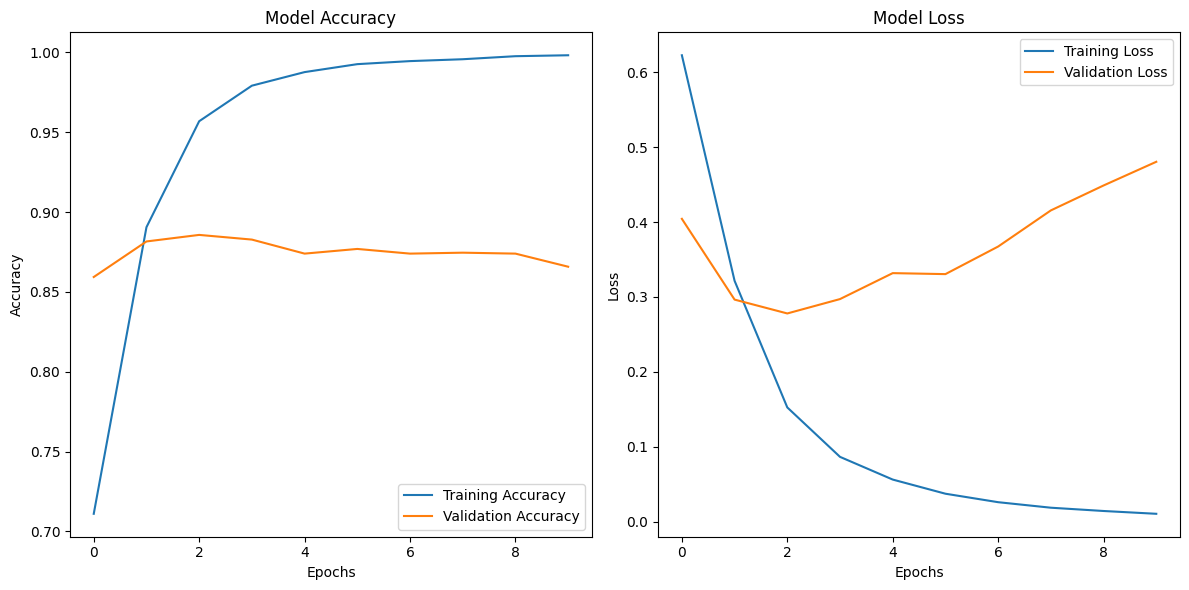

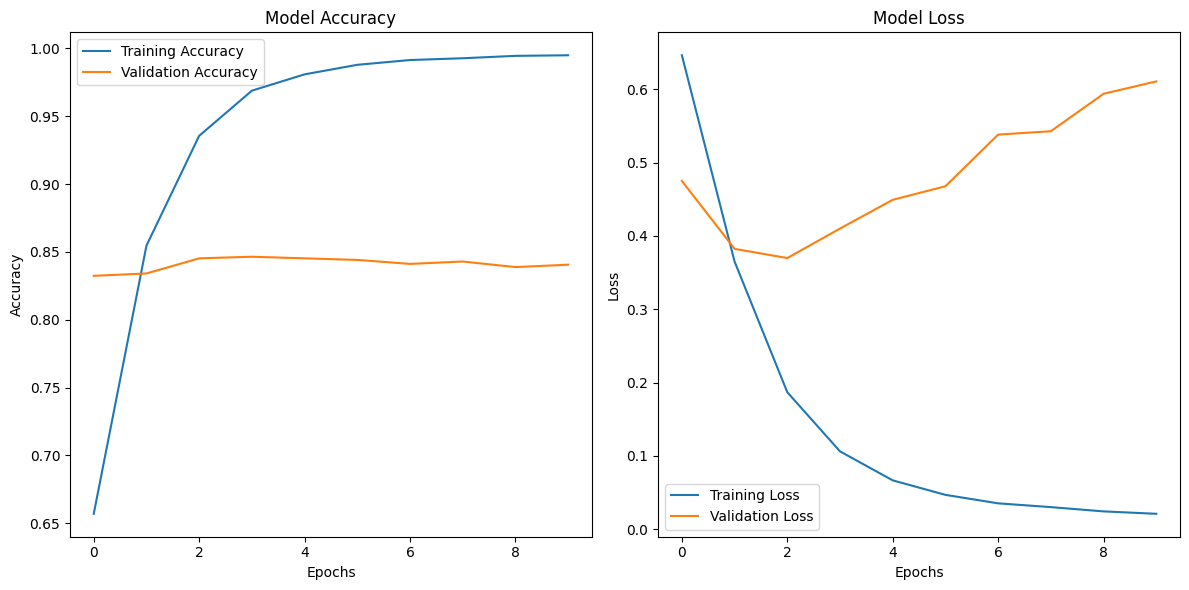

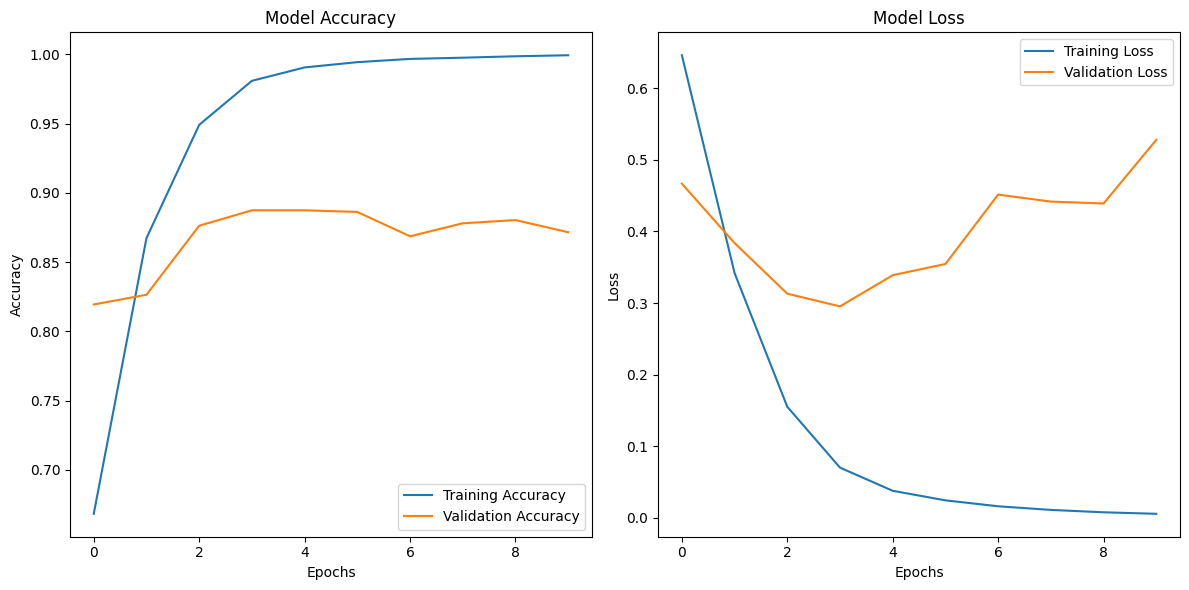

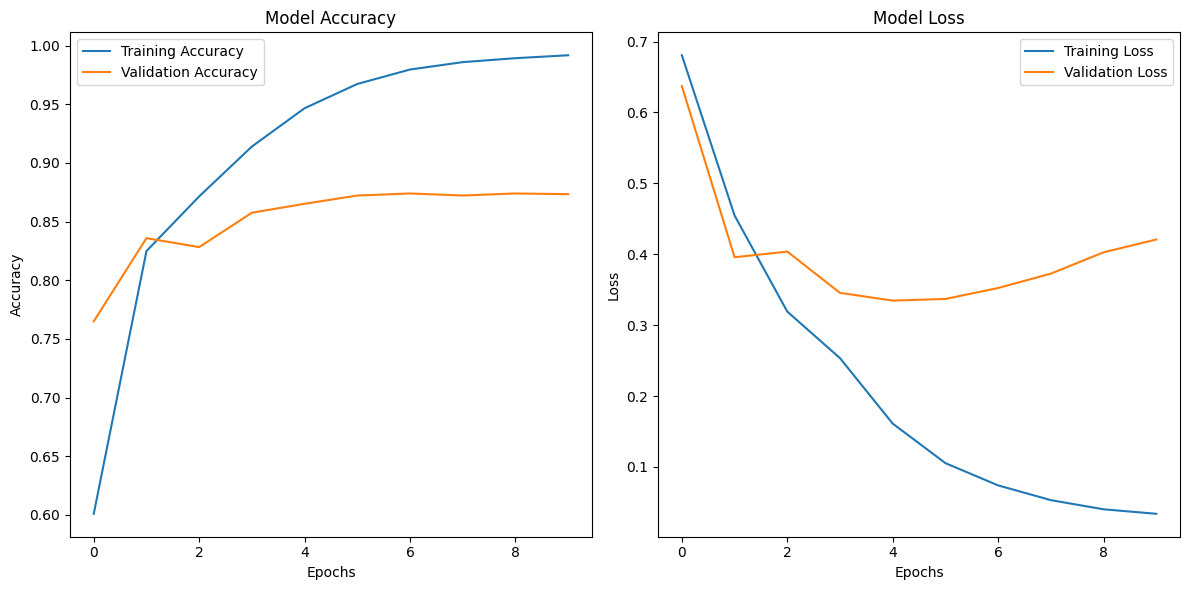

In [41]:

import matplotlib.pyplot as plt
def plot_training_history(history):
    # Plot training & validation accuracy
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history_LSTM)
plot_training_history(history_GRU)
plot_training_history(history_BD)
plot_training_history(history_DO)

In [42]:
model_LSTM.summary()
model_GRU.summary()
model_BD.summary()
model_DO.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)             │ (None, 200, 50)             │       2,350,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 32)                  │          10,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,081,973 (27.02 MB)

 Trainable params: 2,360,657 (9.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,721,316 (18.01 MB)

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)             │ (None, 200, 50)             │       2,350,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_11 (GRU)                         │ (None, 32)                  │           8,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,074,293 (26.99 MB)

 Trainable params: 2,358,097 (9.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,716,196 (17.99 MB)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)             │ (None, 200, 50)             │       2,350,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 64)                  │          16,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,098,581 (27.08 MB)

 Trainable params: 2,366,193 (9.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,732,388 (18.05 MB)

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)             │ (None, 200, 50)             │       2,350,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 200, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 64)                  │          16,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,098,581 (27.08 MB)

 Trainable params: 2,366,193 (9.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,732,388 (18.05 MB)